In [1]:
# imports

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from copy import deepcopy

# Homework 1
Jackson Paull
5 September 2023

In [2]:
def increase_depth(img, num_channels):
    return np.stack([img] * num_channels, axis=2)

## Problem 1 - Basic Image Processing (30 points)
In this problem, you will be performing a few basic operations on images. You will be working on
the image given below, which can be downloaded from Files -> HW1 -> Images tab in Canvas.
For this problem, use a new color image named "balloons.jpg," which can be downloaded from
the Files tab on Canvas.

### a) (1 point) 
Read the "balloons.jpg" image and display it in a new window.

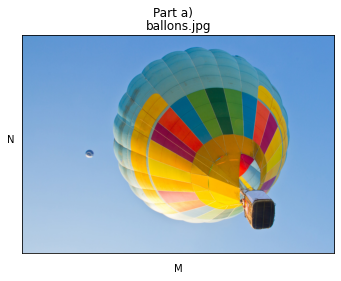

In [3]:
# Load image
_balloons = Image.open('./images/balloons.jpg')
_balloons.load()

balloons = np.asarray(_balloons, dtype='int32')

# Show image
fig, ax = plt.subplots()
fig.suptitle('Part a)')
ax.imshow(balloons)
ax.tick_params(left = False, bottom=False)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_ylabel('N', rotation='horizontal')
ax.set_xlabel('M')
ax.set_title('ballons.jpg')

plt.show()

### b) (3 points) 
Extract the Red, Green, and Blue color channels from the image and show
these three color component images along with the original image in a 2x2 grid with
labels.


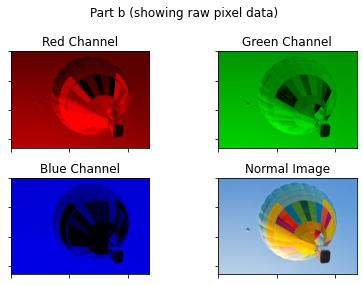

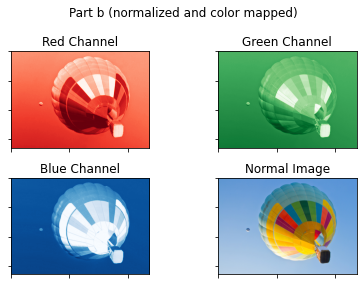

In [4]:
balloon_r, balloon_g, balloon_b = np.split(balloons, 3, axis=2) # Split into R G and B channels
balloon_r, balloon_g, balloon_b = balloon_r.squeeze(), balloon_g.squeeze(), balloon_b.squeeze()

# Move back into RGB format for raw data imshow
z = np.zeros(balloon_r.shape, dtype='int32')
b_r = np.stack([balloon_r, z, z], axis=2)
b_g = np.stack([z, balloon_g, z], axis=2)
b_b = np.stack([z, z, balloon_b], axis=2)

# Show images
fig, axs = plt.subplots(2, 2)
plt.setp(axs, xticklabels=[], yticklabels=[])

fig.suptitle('Part b (showing raw pixel data)')

axs[0, 0].imshow(b_r)
axs[0, 0].set_title('Red Channel')
axs[0, 1].imshow(b_g)
axs[0, 1].set_title('Green Channel')
axs[1, 0].imshow(b_b)
axs[1, 0].set_title('Blue Channel')
axs[1, 1].imshow(balloons)
axs[1, 1].set_title('Normal Image')

fig.tight_layout()
plt.show()

# Include a slightly more visually pleasing array
fig, axs = plt.subplots(2, 2)
plt.setp(axs, xticklabels=[], yticklabels=[])

fig.suptitle('Part b (normalized and color mapped)')

axs[0, 0].imshow(balloon_r, cmap='Reds', norm=Normalize())
axs[0, 0].set_title('Red Channel')
axs[0, 1].imshow(balloon_g, cmap='Greens')
axs[0, 1].set_title('Green Channel')
axs[1, 0].imshow(balloon_b, cmap='Blues')
axs[1, 0].set_title('Blue Channel')
axs[1, 1].imshow(balloons)
axs[1, 1].set_title('Normal Image')

fig.tight_layout()
plt.show()

### Part c
(5 points) YUV is an older color space described in Module - 1, with the equations to
compute Y, U and V from RGB. Convert the original image to YUV format, i.e. generate
three images of Y, U and V components separately by using the converting equation.
Display all three of these images side-by-side.

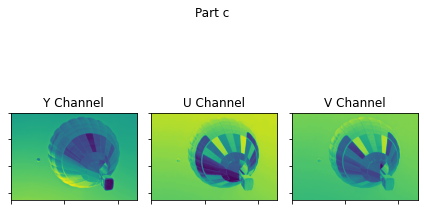

In [5]:
Y = np.average(balloons, axis=2) / 255
U =  0.492 * ( balloon_b / 255 - Y)
V = -0.877 * ( balloon_r / 255 - Y)

fig, axs = plt.subplots(1, 3)
fig.suptitle('Part c')
plt.setp(axs, xticklabels=[], yticklabels=[])
axs[0].imshow(Y)
axs[0].set_title('Y Channel')
axs[1].imshow(U)
axs[1].set_title('U Channel')

axs[2].imshow(V)
axs[2].set_title('V Channel')

fig.tight_layout()
plt.show()


### Part D
(5 points) Convert the original image to grayscale image. Write your own function to
create the grayscale from the color image. Create 4 different images each with different
color intensity weightings, one of which should have equal color intensity weighting for R,
G and B. Display these 4 images in a 2x2 grid with labels.

In [6]:
def to_grayscale(image, weights=None):
    if weights is None:
        weights = np.ones(3) / 3
    x = np.matmul(image, weights) / 255
    return np.stack([x, x, x], axis=2)

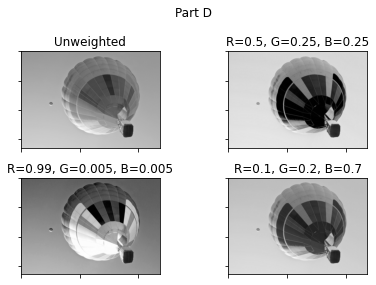

In [7]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Part D')
plt.setp(axs, xticklabels=[], yticklabels=[])
axs[0,0].set_title('Unweighted')
axs[0,0].imshow(to_grayscale(balloons))

axs[0,1].set_title('R=0.5, G=0.25, B=0.25')
axs[0,1].imshow(to_grayscale(balloons, weights = np.array([0.0, 0.0, 1.0])))

axs[1,0].set_title('R=0.99, G=0.005, B=0.005')
axs[1,0].imshow(to_grayscale(balloons, weights = np.array([0.99,0.005,0.005])))

axs[1,1].set_title('R=0.1, G=0.2, B=0.7')
axs[1,1].imshow(to_grayscale(balloons, weights = np.array([0.1,0.2,0.7])))

fig.tight_layout()
plt.show()

### Part E
(4 points) Rotate the top left quarter of the image by 180 degrees. You cannot use the
built-in function imrotate or equivalents. Display the updated image in a new window.


In [8]:
def flip_image(image, p1=None, p2=None, x=False, y=False):
    image = deepcopy(image)
    if p1 is not None and p2 is not None:
        r = image[p1[0]:p2[0], p1[1]:p2[1]]
    else:
        r = image
        
    if x:
        r = np.flip(r, axis=1)
    if y:
        r = np.flip(r, axis=0)

    if p1 is not None and p2 is not None:
        image[p1[0]:p2[0], p1[1]:p2[1]] = r
        return image
    else:
        return r



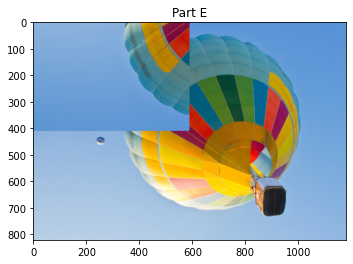

In [9]:
plt.imshow(flip_image(balloons, x=False, y=True, p1=(0, 0), p2=[x//2 for x in balloons.shape[:2]]))
plt.title('Part E')
plt.show()

### Part F
(4 points) Flip the original image horizontally (along the central vertical axis) and
vertically. Display the original image and the two flipped images in a 1x3 grid with labels.
You cannot use the built-in functions fliplr and flipud or equivalents.


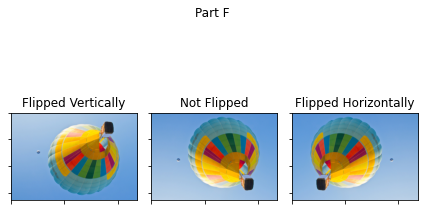

In [10]:
fig, axs = plt.subplots(1, 3)
fig.suptitle('Part F')
plt.setp(axs, xticklabels=[], yticklabels=[])

axs[0].imshow(flip_image(balloons, x=False, y=True))
axs[0].set_title('Flipped Vertically')
axs[1].imshow(balloons)
axs[1].set_title('Not Flipped')

axs[2].imshow(flip_image(balloons, x=True, y= False))
axs[2].set_title('Flipped Horizontally')

fig.tight_layout()
plt.show()


### Part G
(4 points) Implement a color filter that emphasizes a specific color (e.g., blue, red, or
green) in the image. Apply the filter and display the result.

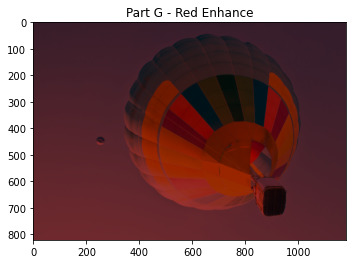

In [11]:

plt.title('Part G - Red Enhance')
w = np.array([[0.6, 0.0, 0.0],
                [0.0, 0.2, 0.0],
                [0.0, 0.0, 0.2]])

# Increase the intensity of red pixels in the image
plt.imshow(np.matmul(balloons, w) / 255)
plt.show()

### Part H
(4 points) Apply a custom color enhancement technique of your choice to enhance the
visual appeal of the image. Explain the technique and its effects. Display the enhanced
color image and provide a brief description of the enhancement.


In [12]:
# TODO

## Problem 2 - Histogram Equalization and Contrast Enhancement

In this problem, you will work on generating the histogram of an image, and performing
operations on the histogram to enhance the contrast of the image. Do not use the built-in
functions imhist, imadjust, or histeq functions. You should create your own histogram
manipulation functions.

### Part a

(2 points) Read the image in grayscale. Compute and plot the histogram of the image
and display it in a new window with a label. You are not allowed to use the imhist inbuilt
function. Is the image underexposed or overexposed?


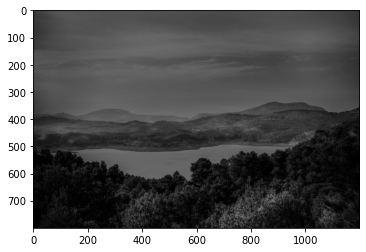

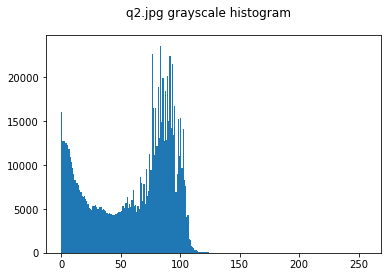

In [13]:
_q2 = Image.open('./images/q2.jpg')
_q2.load()

q2 = np.asarray(_q2, dtype='int32')
plt.imshow(q2)

plt.figure()
plt.suptitle('q2.jpg grayscale histogram')
plt.hist(q2[:,:,0].reshape(-1), bins=256, range=(0,256)) # Plot histogram
plt.show()

Q: Is this image underexposed or overexposed?
> This image is underexposed - identifiable by its grayscale histogram being concentrated solely on the lower end of the spectrum

### Part b

(5 points) Implement the full scale contrast stretch (FSCS) algorithm. Write a function
called "contrast_stretching(image)" that takes the original grayscale image as input and
returns the enhanced image. Apply this function to the "q2.jpg" image

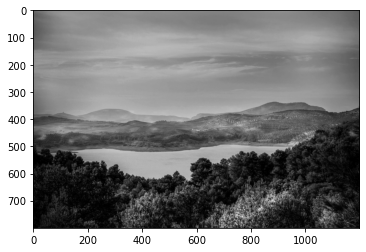

In [14]:
def contrast_stretching(image):
    a, b = np.min(image), np.max(image)

    return ((image-a) * (255/b)).astype('int32')

q2_fscs = contrast_stretching(q2)
plt.imshow(q2_fscs)

### Part c

(5 points) You need to now implement the logarithmic contrast compression. Write a
function “log_contrast_compression(image)”, which takes the input as the original image
and gives output as the logarithmic contrast compressed image. Take q2.jpg, pass it
through “log_contrast_compression(image)”, and pass the output of this function through
“contrast_stretching(image)” (FSCS algorithm). Display the logarithmic contrast
compressed image, its histogram, the final image after passing through both the
functions and its histogram in a 2x2 grid with labels.


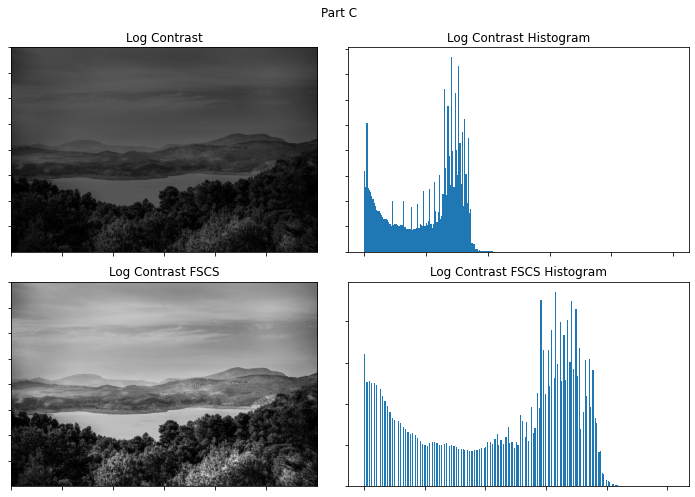

In [15]:
def log_contrast_compression(image):
    return np.log(1 + image)

q2_lc = log_contrast_compression(q2 / 255)
q2_lc_fscs = contrast_stretching(q2_lc)


fig, axs = plt.subplots(2,2)
fig.set_figwidth(10)
fig.set_figheight(7)
plt.setp(axs, xticklabels=[], yticklabels=[])
fig.suptitle('Part C')

axs[0,0].imshow(q2_lc)
axs[0,0].set_title('Log Contrast')

axs[0,1].hist(q2_lc[:,:,0].reshape(-1), bins=256, range=(0,1))
axs[0,1].set_title('Log Contrast Histogram')

axs[1,0].imshow(q2_lc_fscs)
axs[1,0].set_title('Log Contrast FSCS')

axs[1,1].hist(q2_lc_fscs[:,:,0].reshape(-1), bins=256, range=(0,255))
axs[1,1].set_title('Log Contrast FSCS Histogram')

fig.tight_layout()
plt.show()

### Part d

(5 points) Implement the Gamma Correction algorithm. Write a function called
"gamma_correction(image, gamma)" that takes the original grayscale image and a
gamma value as inputs and returns the gamma-corrected image. Experiment with
different gamma values to find one that works well for the image. Display the processed
image and mention the value of 'gamma' used.


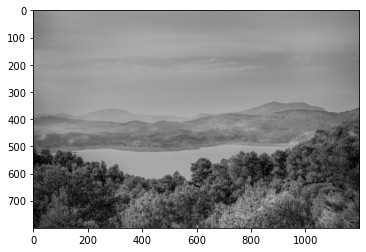

In [16]:
def gamma_correction(image, gamma=0.8):
    if image.dtype == 'int32':
        image = image / 255
    return np.power(image, gamma)

q2_gc = gamma_correction(q2, 0.45)
plt.imshow(q2_gc)

> The chosen gamma value I used was $\gamma = 0.45$ as this value seemed to bring the most contrast to the foreground shrubbery, which is the focus of the image

### Part e

(3 points) Display the original "q2.jpg" image and the three enhanced images obtained
from Contrast Stretching, Logarithmic Range Compression, and Gamma Correction in a
2x2 grid with labels. Analyze the visual quality of the images and determine which
enhancement technique performs best for the "q2.jpg" image. Provide a brief explanation
of your choice.


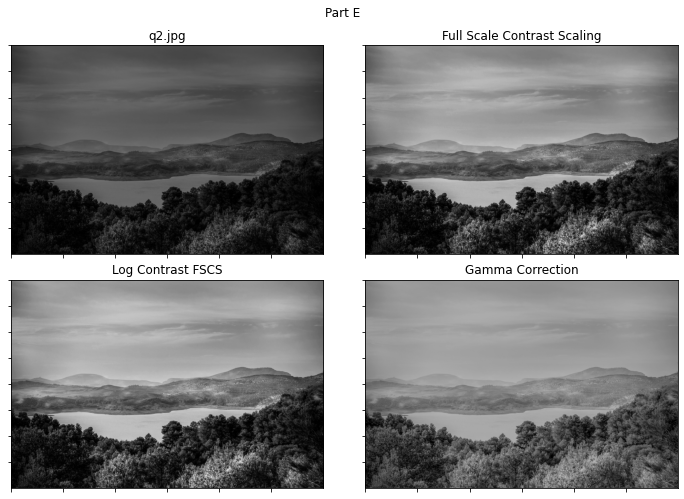

In [17]:
fig, axs = plt.subplots(2,2)
fig.set_figwidth(10)
fig.set_figheight(7)
plt.setp(axs, xticklabels=[], yticklabels=[])
fig.suptitle('Part E')

axs[0,0].imshow(q2)
axs[0,0].set_title('q2.jpg')

axs[0,1].imshow(q2_fscs)
axs[0,1].set_title('Full Scale Contrast Scaling')

axs[1,0].imshow(q2_lc_fscs)
axs[1,0].set_title('Log Contrast FSCS')

axs[1,1].imshow(q2_gc)
axs[1,1].set_title('Gamma Correction')

fig.tight_layout()
plt.show()

## Problem 3 - Binary Image Morphology
We are going to apply morphological operators on the two images given below, and analyze the
effects of these operations.


### Part A

(5 points) Read both the images in grayscale. Before running morphological operations,
binarize the images by applying thresholding with an appropriate threshold value.
Display the two thresholded images side by side. Explain which image thresholding is
more effective and why. For the subsequent parts of this question, you will be working
with these thresholded images, not the original images.


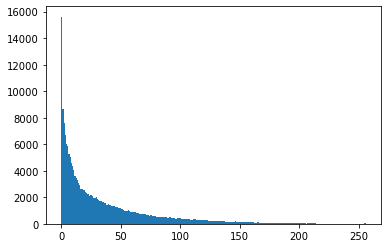

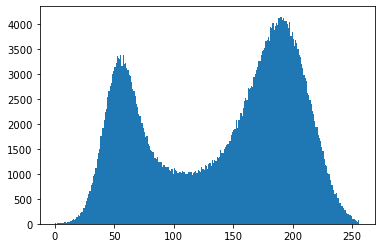

In [18]:
_fingerprint = Image.open('./images/fingerprint.jpg')
_fingerprint.load()
fingerprint = np.asarray(_fingerprint, dtype='int32')

_stars = Image.open('./images/stars.jpg')
_stars.load()
stars = np.asarray(_stars, dtype='int32')

plt.hist(stars[:,:,0].reshape(-1), bins=256, range=(0,256))
plt.show()
plt.hist(fingerprint[:,:,0].reshape(-1), bins=256, range=(0,256))
plt.show()

#Binarize
stars = (stars > 50).astype(float)
fingerprint = (fingerprint > 100).astype(float)

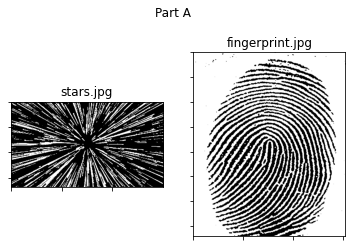

In [19]:
fig, axs = plt.subplots(1,2)
plt.setp(axs, xticklabels=[], yticklabels=[])
fig.suptitle('Part A')

axs[0].imshow(stars)
axs[0].set_title('stars.jpg')
axs[1].imshow(fingerprint)
axs[1].set_title('fingerprint.jpg')

plt.show()

### Part B

(10 points) Implement two functions: "custom_dilate()" and "custom_erode()." These
functions should take the binary image and the size of a square structuring element as
inputs and return the dilated and eroded images, respectively. You are not allowed to
use loops in your implementations. Helpful functions: pad, im2col, reshape,
numpy.lib.stride_tricks.sliding_window_view(), Display the dilated and eroded images of
both "stars.jpg" and "fingerprint.jpg" (thresholded images) in a 2x2 grid with labels.

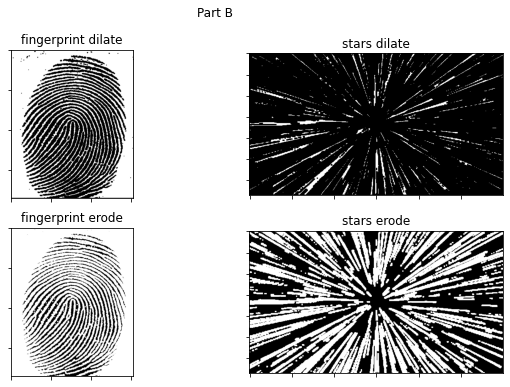

In [20]:
def custom_dilate(image, square_size=3):
    # Select first channel if an RGB image is passed
    if image.shape[-1] == 3:
        image = image[:,:,0]

    image = np.pad(image, square_size // 2)
    w = np.lib.stride_tricks.sliding_window_view(image, (square_size, square_size), writeable=True)
    return increase_depth(w.min(axis=(2,3)), 3)


def custom_erode(image, square_size=3):
    if image.shape[-1] == 3:
        image = image[:,:,0]

    image = np.pad(image, square_size // 2)
    w = np.lib.stride_tricks.sliding_window_view(image, (square_size, square_size), writeable=True)
    return increase_depth(w.max(axis=(2,3)), 3)

f_d = custom_dilate(fingerprint)
f_e = custom_erode(fingerprint)
s_d = custom_dilate(stars)
s_e = custom_erode(stars)

fig, axs = plt.subplots(2,2)
fig.set_figheight(6)
fig.set_figwidth(10)
plt.setp(axs, xticklabels=[], yticklabels=[])
fig.suptitle('Part B')

axs[0,0].imshow(f_d)
axs[0,0].set_title('fingerprint dilate')
axs[1,0].imshow(f_e)
axs[1,0].set_title('fingerprint erode')

axs[0,1].imshow(s_d)
axs[0,1].set_title('stars dilate')
axs[1,1].imshow(s_e)
axs[1,1].set_title('stars erode')

plt.show()

### Part C 

(5 points) Modify your "custom_dilate()" and "custom_erode()" functions to implement
five additional morphological operations: opening, closing, open-close, close-open, and
median filtering. Run "fingerprint.jpg" (thresholded) through each of these five functions
and display the five output images in a 1x5 grid with labels

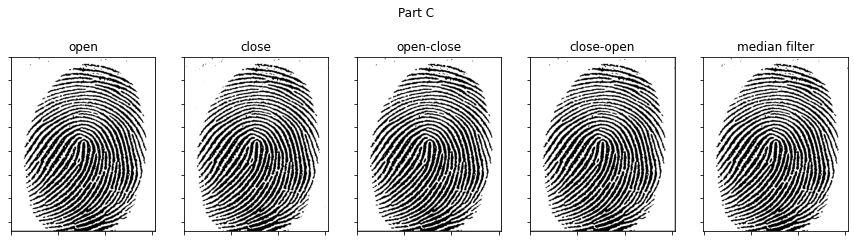

In [117]:
def custom_open(image, square_size=3):
    return custom_dilate(custom_erode(image, square_size), square_size)

def custom_close(image, square_size=3):
    return custom_erode(custom_dilate(image, square_size), square_size)

def open_close(image, square_size=3):
    return custom_open(custom_close(image, square_size), square_size)

def close_open(image, square_size=3):
    return custom_close(custom_open(image, square_size), square_size)

def median_filter(image, square_size=3):
    if image.shape[-1] == 3:
        image = image[:,:,0]

    image = np.pad(image, square_size // 2)
    w = np.lib.stride_tricks.sliding_window_view(image, (square_size, square_size), writeable=True)
    return increase_depth(np.median(w, axis=(2,3)), 3)

def border_filter(image, square_size=3):
    if image.shape[-1] == 3:
        i = image[:,:,0]
    else:
        i = image

    i = np.pad(i, square_size // 2)
    w = np.lib.stride_tricks.sliding_window_view(i, (square_size, square_size), writeable=True)

    # Select cross
    a = np.median(w[:,:,:square_size // 2, square_size // 2], axis=-1)
    b = np.median(w[:,:,square_size // 2 + 1:, square_size // 2], axis=-1)

    c = np.median(w[:,:,square_size // 2, :square_size // 2], axis=-1)
    d = np.median(w[:,:,square_size // 2, square_size // 2 + 1:], axis=-1)

    np.stack([a,b,c,d], axis=-1)

    x = np.stack([a,b,c,d], axis=-1)
    t = (increase_depth(image[:,:,0], 4) != x).any(axis=-1).astype(float)
    return increase_depth(t, 3)



fig, axs = plt.subplots(1, 5)
fig.set_figwidth(15)
plt.setp(axs, xticklabels=[], yticklabels=[])
fig.suptitle('Part C')

axs[0].imshow(custom_open(fingerprint))
axs[0].set_title('open')

axs[1].imshow(custom_close(fingerprint))
axs[1].set_title('close')

axs[2].imshow(open_close(fingerprint))
axs[2].set_title('open-close')

axs[3].imshow(close_open(fingerprint))
axs[3].set_title('close-open')

axs[4].imshow(median_filter(fingerprint))
axs[4].set_title('median filter')

plt.show()

### Part D
(5 points) Generate a clean binary image from the thresholded "fingerprint.jpg" image by
removing small isolated regions and filling holes. Use a combination of morphological
operations such as erosion, dilation, opening, or closing. Create a boundary image of the
cleaned object. Display the boundary image and the thresholded "fingerprint.jpg" image
side by side.

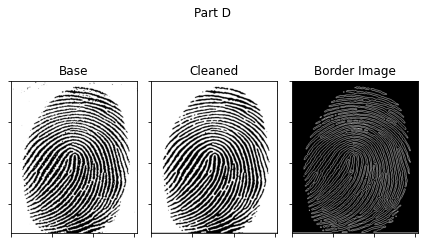

In [121]:
f = median_filter(fingerprint)
f = custom_open(f)
f = custom_open(f)
f = median_filter(f, square_size=7)


fig, axs = plt.subplots(1, 3)
plt.setp(axs, xticklabels=[], yticklabels=[])
fig.suptitle('Part D')

axs[0].imshow(fingerprint)
axs[0].set_title('Base')

axs[1].imshow(f)
axs[1].set_title('Cleaned')

axs[2].imshow(border_filter(f))
axs[2].set_title('Border Image')

fig.tight_layout()
plt.show()

### Part E
(5 points) Write a function called "boundary_length()" to count the white pixels in the
boundary image in "fingerprint.jpg." Report the calculated boundary length.


In [122]:
def boundary_length(image):
    return np.sum(border_filter(image))

boundary_length(f)

196761.0

> As seen above there is a border length of 196,761 pixels (pixels which border a pixel of a different color in the cleaned image)

## Problem 4 - Bit-Plane Manipulation

In this problem, you will explore bit-plane manipulation and the addition of hidden information to
an image. Download the image "q4.jpg" from the Files tab on Canvas for this problem.


(5 points) Read the image "q4.jpg." Modify it using a 3-bit quantization bar. Essentially,
represent the intensity of each pixel using only 3 bits instead of the original 8 bits.
Display the 3-bit quantized image and the original image side by side.


(5 points) Use the bitget function to extract each of the 8 bit-planes from the 3-bit
quantized image. Display the 8 bit-planes in a 2x4 grid with appropriate labels. Helpful
functions in python: numpy.unpackbits(), numpy.packbits()

(5 points) Experiment with hiding information in the bit-planes. Start by adding hidden
information in bit-plane 1 and reconstructing the image. Then, generate seven more
images by adding hidden information in bit-plane 2, bit-plane 3, and so on, up to
bit-plane 8. Display all eight images with "hidden information" in a 2x4 grid with proper
labels.
After generating these images, answer the following questions:
● Are any of these images perceptually distorted compared to the original 3-bit quantized
image?
● If any are distorted, which ones, and what kind of distortion do you observe?

## Problem 5 - Perceptron in Image Processing
Consider a simple binary image processing task where you want to classify whether an image
contains a specific object (e.g., a circle) or not. You decide to use a single-layer perceptron for
this task.


### Part A
(3 points) Briefly explain what a perceptron is and how it can be applied to image
processing tasks like the one described above.

> A perceptron is a structure which applies a learned set of linear weights and a set of non-linear, but differentiable, activation functions to allow for the same structure to approximate most arbitrary functions with any input. Applying perceptrons to image classification is a classic machine learning problem. By setting the pixels as inputs to the perceptron, and training the model with labels of 1 for circle and 0 for non circle we can expect to observe a classification rate at minimum above random chance


### Part B
(2 points) What are the key components and parameters you would need to define when
implementing a perceptron for this image classification task? Provide a concise list of
these components and parameters.

> The key components I would need to define would be setting the activation function as well as training hyperparameters like learning rate and alpha gamma parameters. Since the perceptron is only single layer, and the output is binary, there is only one activation function to define, and there are no parameters like depth or layer height to consider.